In [50]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np

import cv2
from matplotlib import pylab as plt

import keras
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

from utils import rgb2tensor,grey2rgb,preprocess_mnist,plot_list

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


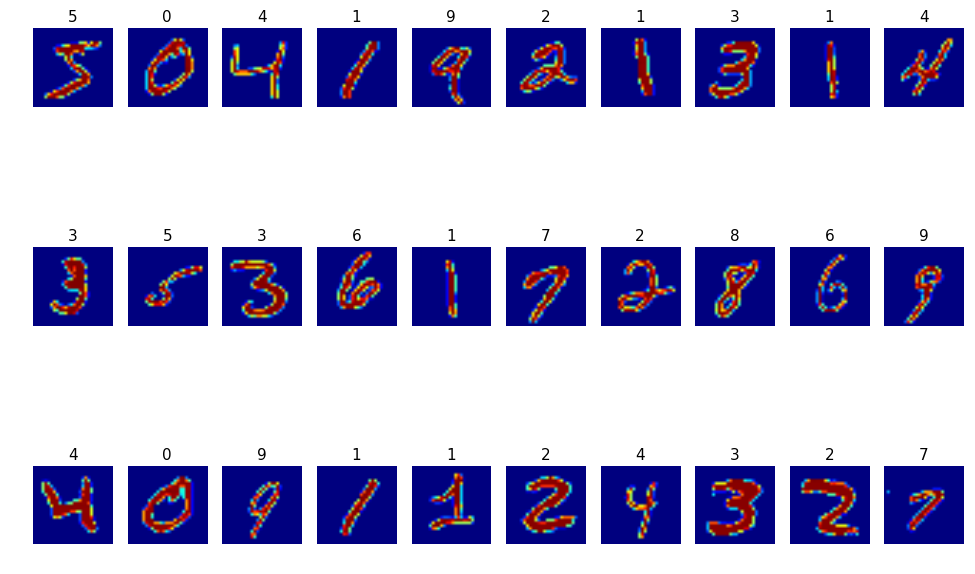

In [73]:
(X_train, y_train),(X_test, y_test)= mnist.load_data()

plot_list(img_list= X_train[:30],
          labels = y_train[:30],
          cols_nr=10,
          plot_config = None)

In [74]:
X_train = np.expand_dims(X_train,axis = 1).transpose(0,2,3,1)/255.
X_test = np.expand_dims(X_test,axis = 1).transpose(0,2,3,1)/255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [78]:
X_train = X_train[:500]
X_test = X_test[:500]
y_train = y_train[:500]
y_test = y_test[:500]

In [81]:
class PlotPredictionCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_epoch_end(self, batch, logs={}):
        predicted_labels = model.predict(X_test[:10])
        predicted_labels = np.argmax(predicted_labels,axis = 1)
        plot_list(img_list= X_test[:10,:,:,0],
                  labels = predicted_labels,
                  cols_nr=10,
                  plot_config = None)

In [ ]:
from keras.layers import Input, Dense, Conv2D, Flatten, Dropout
from keras.models import Model
from keras.callbacks import ModelCheckpoint,Callback

NB_CLASSES = 10
NB_EPOCHS = 20
BATCH_SIZE = 128
MODEL_PATH = os.path.join("models","mnist_model.h5")

inputs = Input(shape=(28,28,1))

x = Conv2D(16,3,3, activation='relu')(inputs)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

predictions = Dense(10, activation='softmax')(x)

model = Model(input=inputs, output=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

plot_predictions = PlotPredictionCallback()
model_checkpoint = ModelCheckpoint(MODEL_PATH, monitor='val_loss', verbose=0, 
                                   save_best_only=True, save_weights_only=False, mode='auto')
model.fit(X_train,y_train, 
          validation_data = [X_test,y_test],
          nb_epoch = NB_EPOCHS,
          batch_size = BATCH_SIZE,
          verbose = 1,
          callbacks = [plot_predictions,model_checkpoint]) 